In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

In [3]:
X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train["Energy Consumption"]

X_TEST = energy_consumption_data_test[energy_consumption_data_train.columns[:-1]]
Y_TEST = energy_consumption_data_test["Energy Consumption"]

In [5]:
regressor = DecisionTreeRegressor(random_state=42, n_jobs=-1)

regressor.fit(X_TRAIN, Y_TRAIN)

Y_PRED = regressor.predict(X_TEST)

print("Best Score (MSE):", (mean_squared_error(Y_TEST, Y_PRED)))
print("RMSE:", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

Best Score (MSE): 195650406.01626086
RMSE: 13987.508928192356
R-squared: -0.1721092959144046
MAE:  11149.21498419597
MAPE:  38.85153564001038


KeyboardInterrupt: 

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pac

Best Parameters:  {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 9, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.4, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 21, 'ccp_alpha': 0.0}
Best Estimator:  DecisionTreeRegressor(max_depth=21, max_features='log2', max_leaf_nodes=10,
                      min_impurity_decrease=0.4, min_samples_leaf=10,
                      min_samples_split=9, min_weight_fraction_leaf=0.1,
                      random_state=42)
Best Score (MSE):  -124263145.78727159
RMSE:  11764.519042989508
NRMSE:  0.17370757232066722
R2 Score:  0.17084502492211218
MAE:  9346.047861393876
MAPE:  38.37830254033908


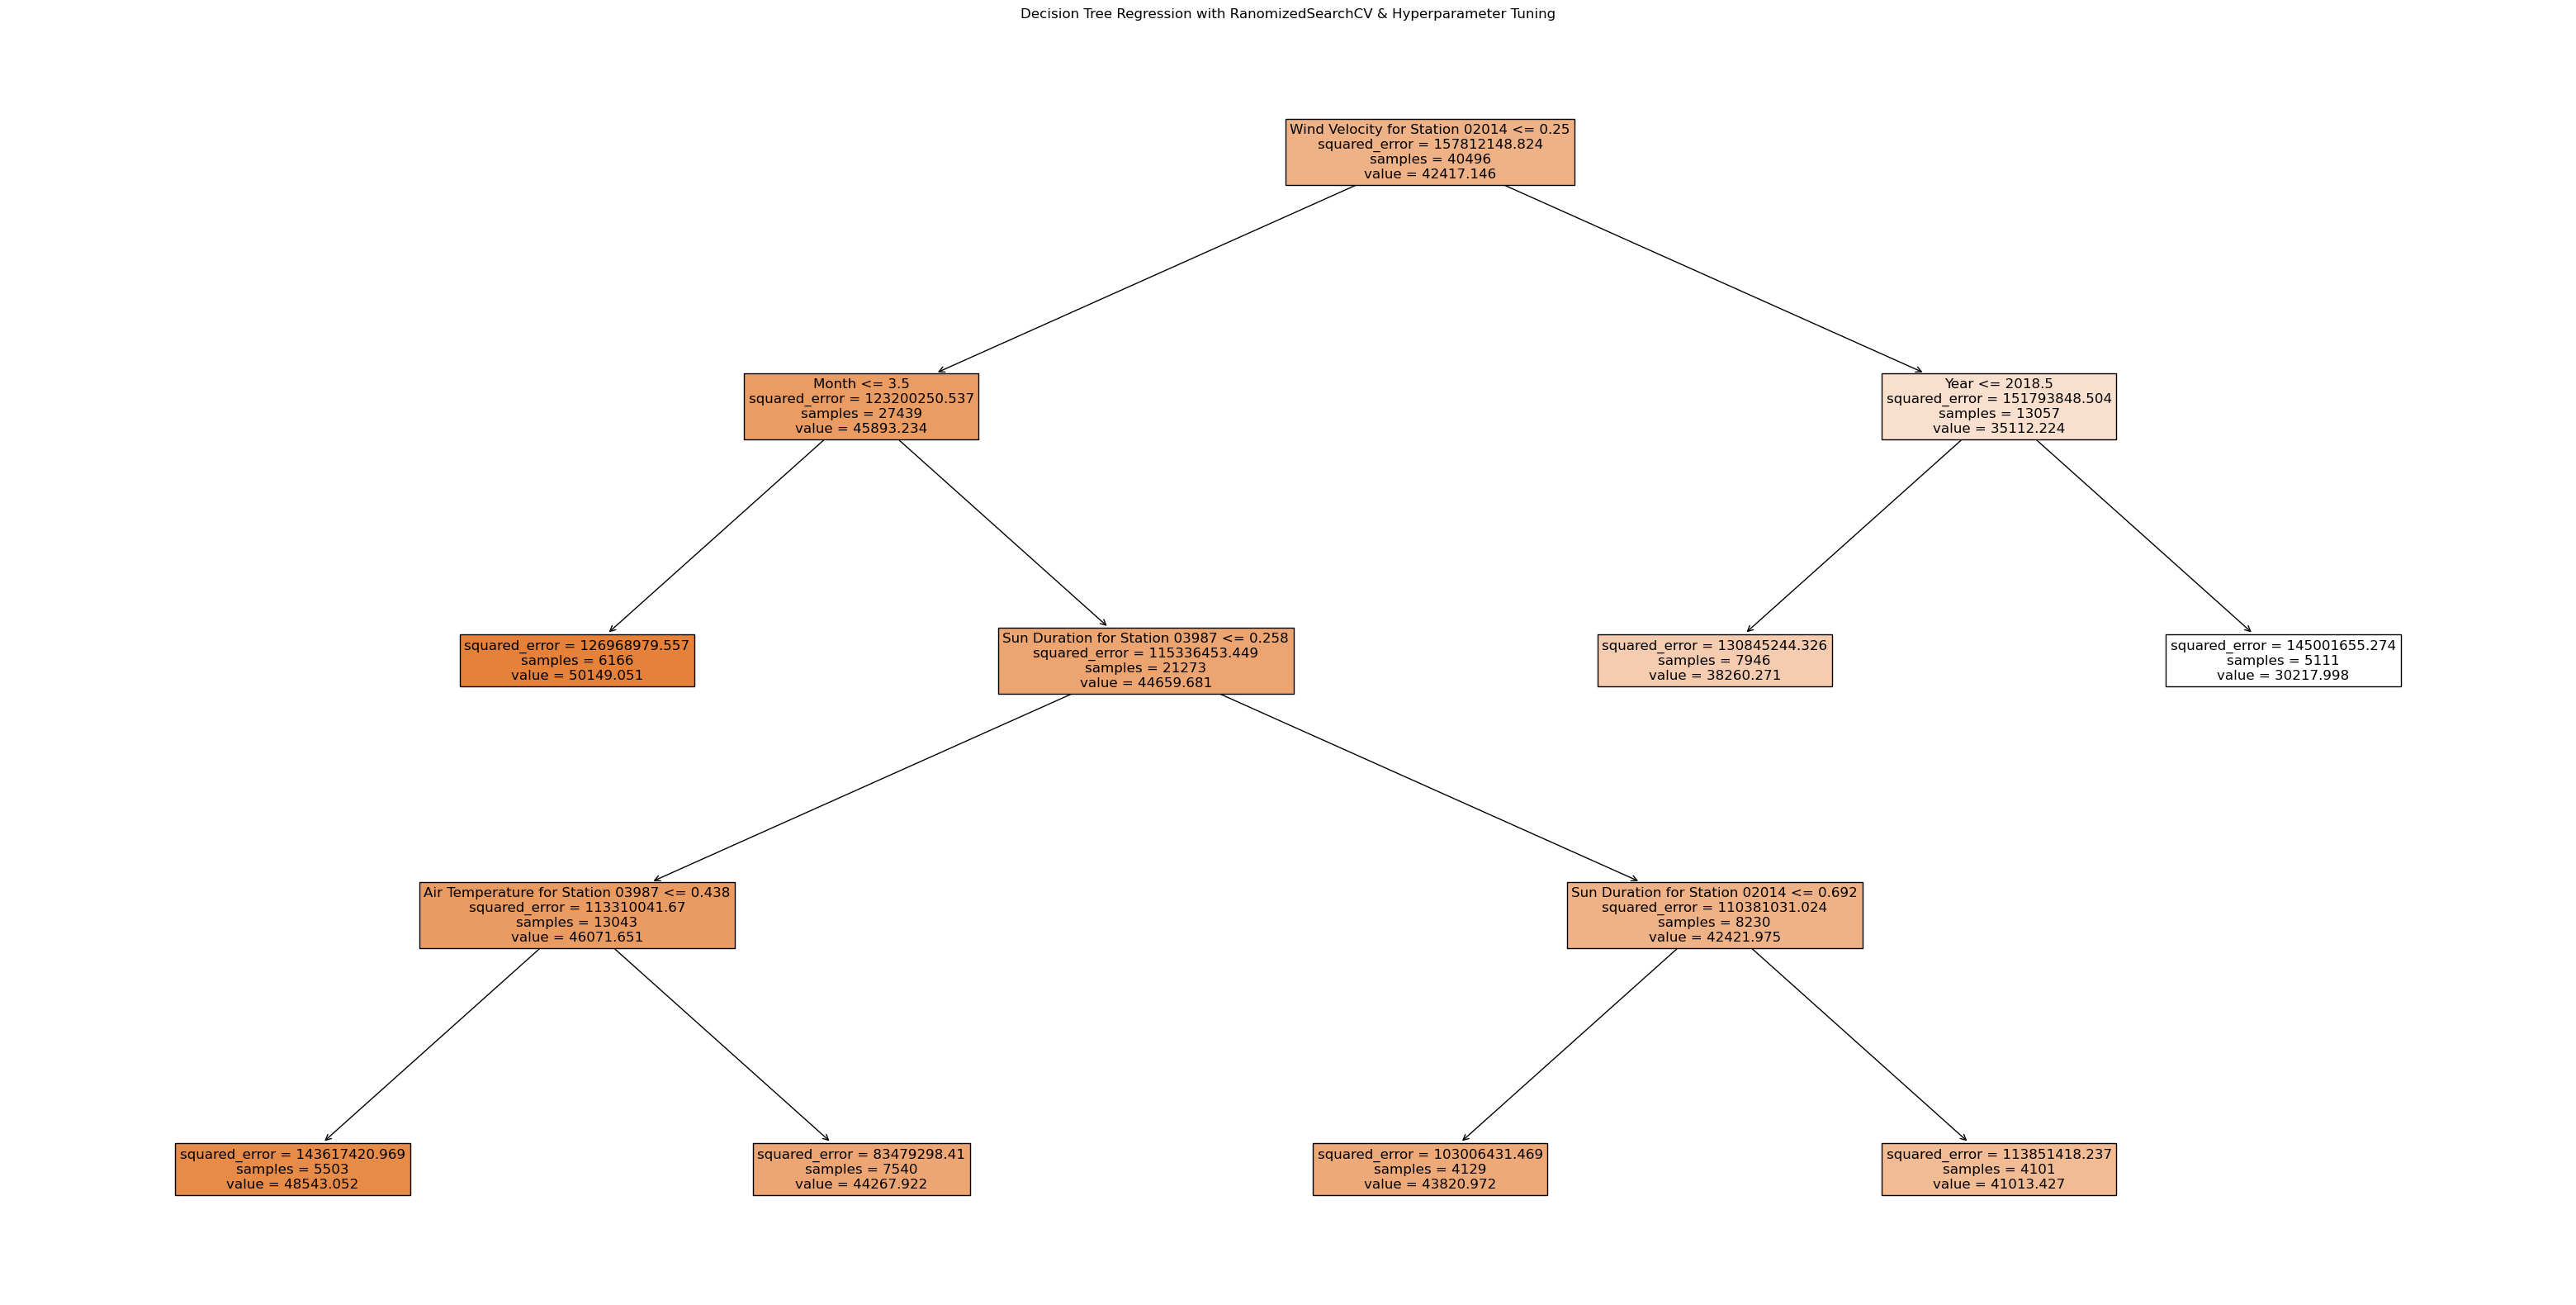

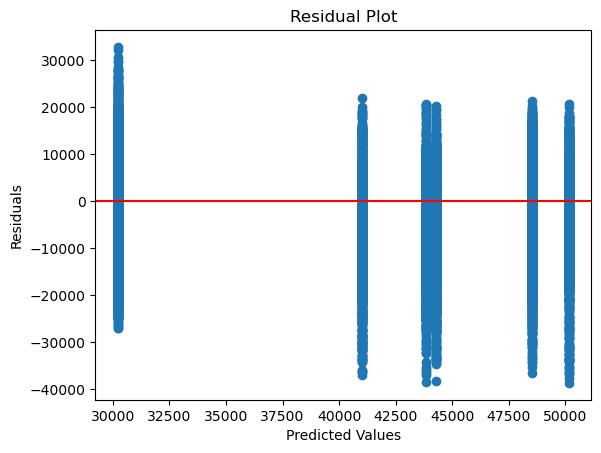

In [11]:
gridParams = {
    'max_depth': range(1, 100),
    'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': range(0,20),
    'max_features': [None, 'sqrt', 'log2', 'auto'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

gridSearch = RandomizedSearchCV(regressor, gridParams, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Decision Tree
plt.figure(figsize=(40,20))
plot_tree(bestRegressor, filled=True, feature_names=feature_names, fontsize=12)
plt.title("Decision Tree Regression with RanomizedSearchCV & Hyperparameter Tuning")
plt.show()

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1260 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
376 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site

Best Parameters:  {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 9, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.4, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 21, 'ccp_alpha': 0.0}
Best Estimator:  DecisionTreeRegressor(max_depth=21, max_features='log2', max_leaf_nodes=10,
                      min_impurity_decrease=0.4, min_samples_leaf=10,
                      min_samples_split=9, min_weight_fraction_leaf=0.1,
                      random_state=42)
Best Score (MSE):  -124263145.78727159
RMSE:  11014.712418746178
NRMSE:  0.16263639398083715
R2 Score:  0.27316859805461435
MAE:  8883.512922091744
MAPE:  35.226003005589604


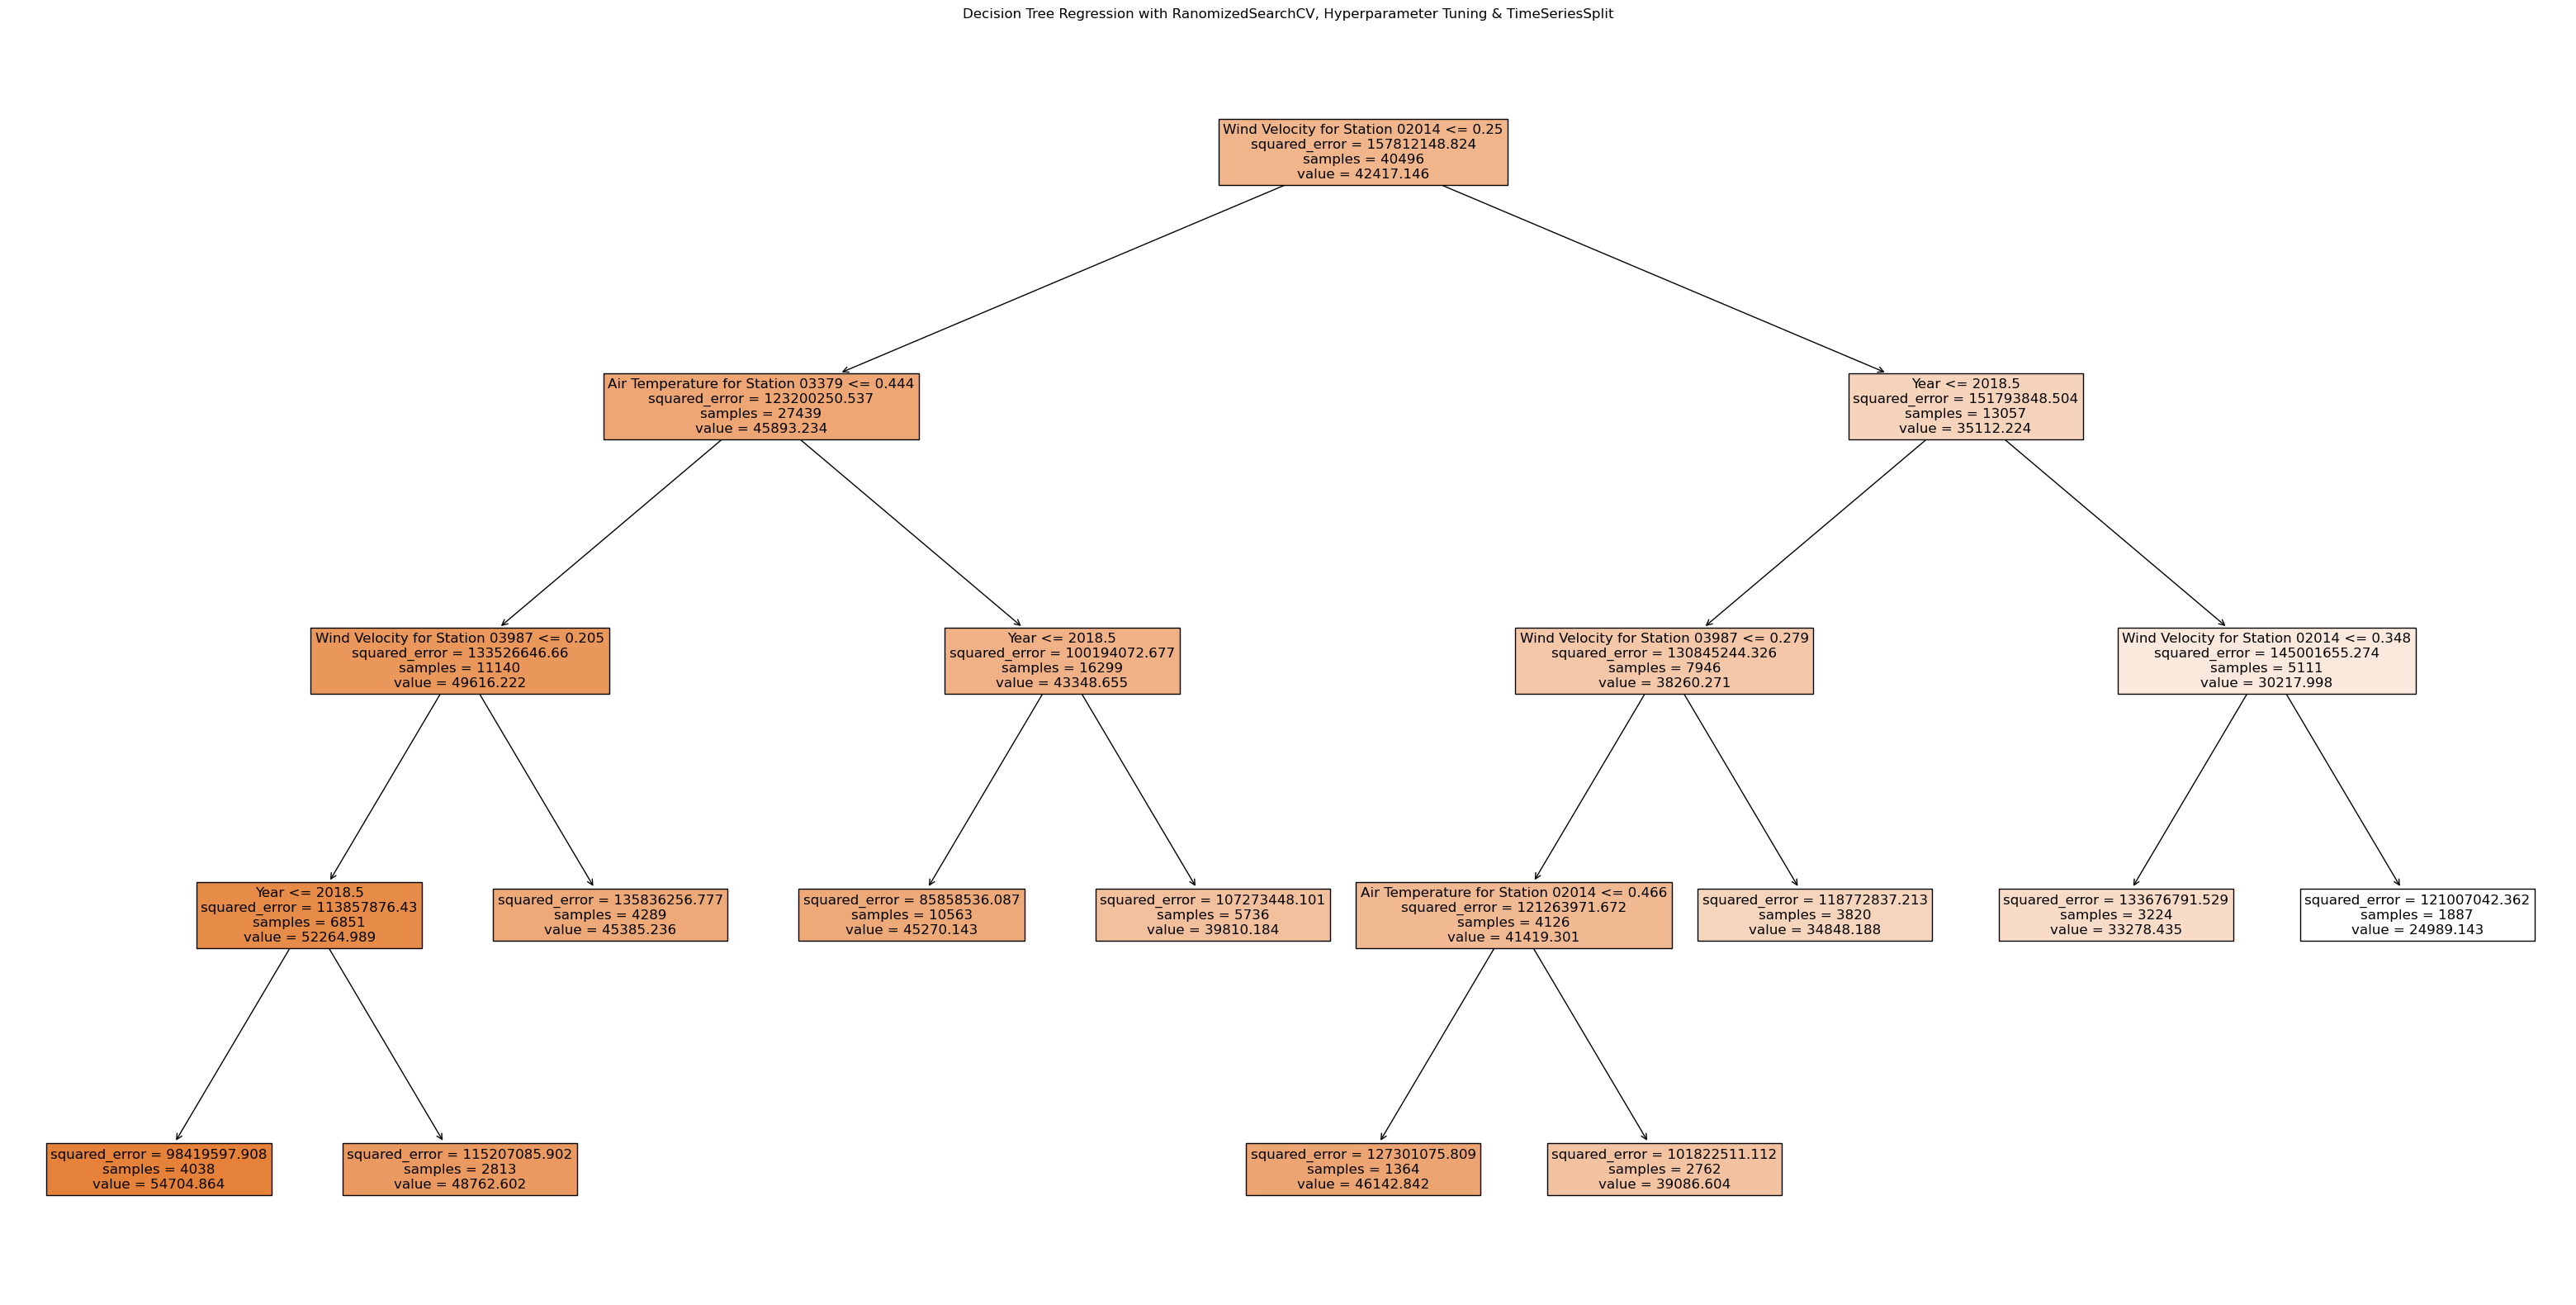

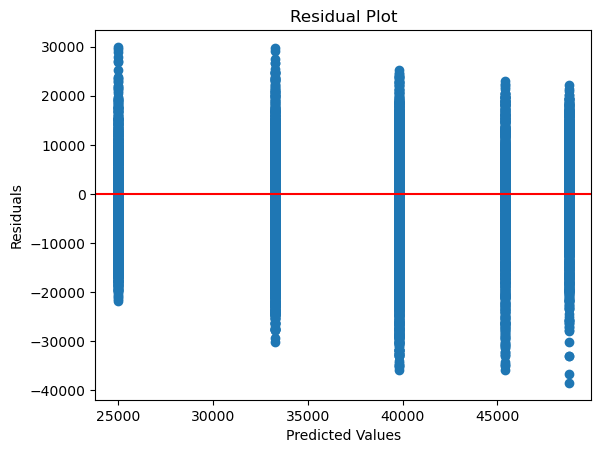

In [13]:
gridParams = {
    'max_depth': range(1, 100),
    'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': range(0,20),
    'max_features': [None, 'sqrt', 'log2', 'auto'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search
grid_search = RandomizedSearchCV(regressor, gridParams, cv=tscv, scoring='neg_mean_squared_error', n_iter=500, n_jobs=-1)
grid_search.fit(X_TRAIN, Y_TRAIN)

# Fit and predict using best estimator
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Decision Tree
plt.figure(figsize=(40,20))
plot_tree(best_regressor, filled=True, feature_names=feature_names, fontsize=12)
plt.title("Decision Tree Regression with RanomizedSearchCV, Hyperparameter Tuning & TimeSeriesSplit")
plt.show()

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()